In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.datasets import load_digits
import pandas as pd

digits = load_digits()

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.3)

In [0]:
def get_score(model):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


In [4]:
lr_score = get_score(LogisticRegression(solver='liblinear',multi_class='ovr'))
print(lr_score)

0.9481481481481482


In [5]:
svr_score = get_score(SVR())
print(svr_score)

0.844790936958911


In [6]:
svc_score = get_score(SVC())
print(svc_score)

0.9907407407407407


In [7]:
dtr_score = get_score(DecisionTreeRegressor(max_depth = 10))
print(dtr_score)

0.6888554861668552


In [8]:
dtc_score = get_score(DecisionTreeClassifier(max_depth = 10))
print(dtc_score)

0.8148148148148148


In [9]:
rfc_score = get_score(RandomForestClassifier(n_estimators = 40))
print(rfc_score)

0.9648148148148148


In [10]:
rfr_score = get_score(RandomForestRegressor(n_estimators = 40))
print(rfr_score)

0.8515606232197399


In [11]:
score = [lr_score*100, svr_score*100, svc_score*100, dtr_score*100, dtc_score*100, rfc_score*100, rfr_score*100]
sc = ['LogisticRegression', 'SVR', 'SVC', 'DecisionTreeRegressor', 'DecisionTreeClassifier', 'RandomForestClassifier', 'RandomForestRegressor']
df = pd.DataFrame(index = sc, data = score, columns = ['score'])
df

,score
LogisticRegression,94.814815
SVR,84.479094
SVC,99.074074
DecisionTreeRegressor,68.885549
DecisionTreeClassifier,81.481481
RandomForestClassifier,96.481481
RandomForestRegressor,85.156062


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
df1 = df.sort_values('score', ascending = False)
df1

,score
SVC,99.074074
RandomForestClassifier,96.481481
LogisticRegression,94.814815
RandomForestRegressor,85.156062
SVR,84.479094
DecisionTreeClassifier,81.481481
DecisionTreeRegressor,68.885549


<BarContainer object of 7 artists>

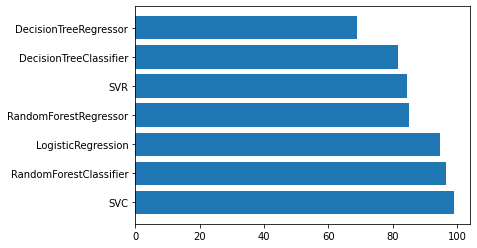

In [14]:
plt.barh(df1.index, df1['score'], data = df1)

Using k fold API

In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [16]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9,10]):
    print(train_index, test_index)

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


In [0]:
# using inbuilt method for better performance
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits = 3)

In [0]:
def get_score_new(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


In [0]:
scores_logistic = []
scores_svc = []
scores_rf = []

for train_index, test_index in folds.split(digits.data,digits.target):
    X_train, X_test, y_train, y_test = digits.data[train_index], digits.data[test_index], \
                                         digits.target[train_index], digits.target[test_index]
    # '\' is used to tell python that command is continued in next line. Caution : Don't put any space after '\'

    scores_logistic.append(get_score_new(LogisticRegression(solver='liblinear',multi_class='ovr'), X_train, X_test, y_train, y_test))  
    scores_svc.append(get_score_new(SVC(), X_train, X_test, y_train, y_test))
    scores_rf.append(get_score_new(RandomForestClassifier(n_estimators=40), X_train, X_test, y_train, y_test))

In [20]:
scores_logistic

[0.8948247078464107, 0.9532554257095158, 0.9098497495826378]

In [21]:
scores_svc

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [22]:
scores_rf

[0.9232053422370617, 0.9549248747913188, 0.9181969949916527]

We can implement the same done above using inbuilt sklearn libraries
```
cross_val_score
```

In [0]:
from sklearn.model_selection import cross_val_score

In [24]:
scores1 = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), digits.data, digits.target, cv = 3)
np.average(scores1)
# cv -> int, cross-validation generator or an iterable, default=None

array([0.89482471, 0.95325543, 0.90984975])

In [27]:
scores2 = cross_val_score(SVC(), digits.data, digits.target, cv = 3)
np.average(scores2)

0.9699499165275459

In [28]:
scores3 = cross_val_score(RandomForestClassifier(n_estimators=30), digits.data, digits.target, cv = 3)
np.average(scores3)

0.9332220367278797

In [29]:
scores4 = cross_val_score(RandomForestClassifier(n_estimators=40), digits.data, digits.target, cv = 3)
np.average(scores4)

0.9404563160823596